In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [23]:
data = r"C:\Users\DELL\Downloads\archive\Housing.csv"

In [24]:
housing_data = pd.read_csv(data)

In [25]:
housing_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
housing_data.shape

(545, 13)

In [27]:
price = housing_data['price']

### Population

In [75]:
population_mean = np.mean(price)
population_std = np.std(price)

print(f'Pop Mean: {population_mean}, Pop Std: {population_std}')

Pop Mean: 4766729.247706422, Pop Std: 1868722.8281312098


### Samples and Sampling

In [36]:
len(housing_data) * 0.2

109.0

In [68]:
# sampling with replacement
sample_size = 109
sample = np.random.choice(price, size=sample_size, replace=True)

### Sample Mean

In [69]:
sample_mean = np.mean(sample)
print(sample_mean)

4802926.055045872


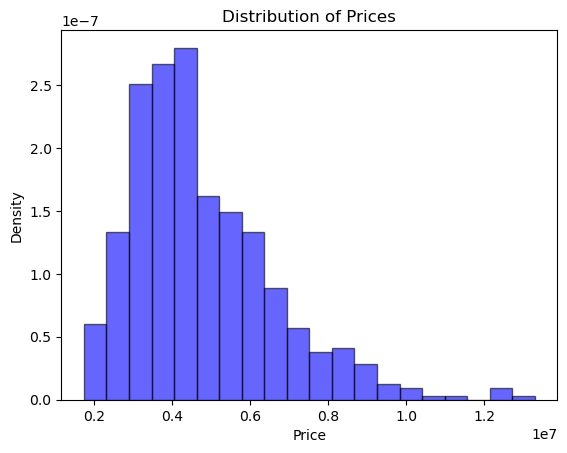

In [42]:
#Plot the distribution of prices

plt.hist(price, bins=20, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Prices')
plt.show()

In [70]:
# CLT: generate multiple samples and compute sample means
num_samples = 1000
sample_means = []

for _ in range(num_samples):
    sample = np.random.choice(price, size=sample_size, replace=True)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

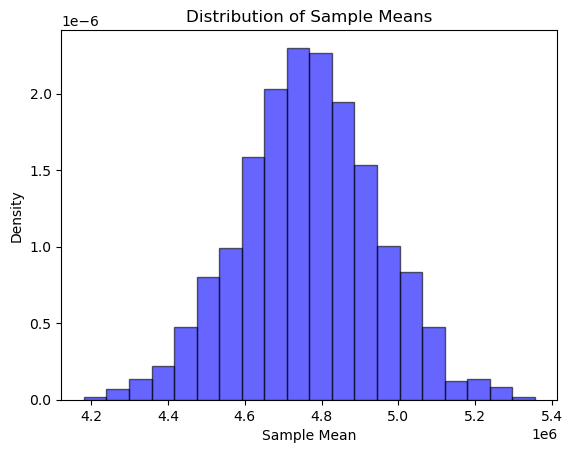

In [71]:
plt.hist(sample_means, bins=20, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.title('Distribution of Sample Means')
plt.show()

In [72]:
mean_samples = np.mean(sample_means)

In [76]:
print(f'Pop Mean: {population_mean}')

Pop Mean: 4766729.247706422


In [74]:
print(f'Mean of Samples: {mean_samples}')

Mean of Samples: 4765819.286880734


### Central Limit Theorem

It's time now to introduce the concept of a sampling distribution, but first let's remind ourselves of a tool that will prove valuable in this quest: the Central Limit Theorem.

The Central Limit Theorem states that if a random variable $X$ is the sum of a large number of independent, identically distributed random outcomes, it will approximately follow a normal distribution, *even if the underlying random variables are not normally distributed*. Proof of this is beyond the scope of the course, but you should realise that this is an asymptotic result: it gets closer and closer to being true as the number of observations increases. As a general rule of thumb, 30 observations are required to rely on the Central Limit Theorem.

In his work, [*Intro to Statistics - Probability and Distributions*](https://www.fd.cvut.cz/department/k611/PEDAGOG/THO_A/A_soubory/statistics_firstfive.pdf), Keon Hon introduces the following the Central Limit theorem in the following manner:  

"Start with a population with a given mean $\mu$  and standard deviation $\sigma$. Take samples of size $n$, where $n$ is a sufficiently large (generally at least 30) number, and compute the mean of each sa
With the following results:

* The set of all sample means will be approximately normally distributed.

* The mean of the set of samples will equal $\mu$, the mean of the population.a}{\sqrt{n}}$"


### Confidence Intervals

Using the central limit theorem, we can find the probability that a sample lies within an interval, but this is essentially the same as the probability of the population mean being estimated into a sample interval. 

As Keone puts it: "We can determine how confident we are that the population mean lies within a certain interval of a sample mean."

If a random variable is normally distributed, we can make statements about how certain we are that it will fall within certain multiples of the standard deviation about the mean. One well-known feature, with which you will become familiar, is that 95% of observations lie within 1.96 standard deviations of the mean. 

Before we get into the code, let's define some terms first:

 * **CDF**:
     - Stands for "Cumulative Distribution Function"
     - The CDF will tell us the probability of a value being below $x$.
<br>

 * **PPF** :
     - Stands for "Percent Point Function".
     - This is the inverse of a CDF 
     - Another name for a _quantile function_.


If you want to understand PPF's and CDF's in more detail, go to [this link](https://www.countbayesie.com/blog/2015/4/4/parameter-estimation-the-pdf-cdf-and-quantile-function) which describes those concepts and other distributions.

Let's now look at things in a practical manner. We start by importing our de facto Python statistical library, Scipy:

# Exercise 1 
Foodland shoppers have a mean R60 grocery bill with a standard deviation of R40. What is the probability that a sample of 100 Foodland shoppers will have a mean grocery bill of over R70?

In [65]:
import scipy.stats as stats
# data
population_mean = 60
population_std = 40
sample_size = 100
desired_sample_mean = 70

#standard error (population_std/square root of sample size)
standard_error = population_std/(sample_size ** 0.5)

# z_score/ standard score
z_score = (desired_sample_mean - population_mean)/standard_error

# probabilty
probability = 1 - stats.norm.cdf(z_score)

In [67]:
z_score

2.5